In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### FuelConsumption

**Problem Stastement:** Ability to model and predict the fuel consumption is vital in enhancing fuel economy of vehicles and preventing fraudulent activities in fleet management. Fuel consumption of a vehicle depends on several internal factors such as distance, load, vehicle characteristics, and driver behavior, as well as external factors such as road conditions, traffic, and weather. However, not all these factors may be measured or available for the fuel consumption analysis. We consider a case where only a subset of the aforementioned factors is available as a multi-variate time series from a long distance, public bus. Hence, the challenge is to model and/or predict the fuel consumption only with the available data, while still indirectly capturing as much as influences from other internal and external factors. Machine Learning (ML) is suitable in such analysis, as the model can be developed by learning the patterns in data.

In [3]:
URL = 'https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/FuelConsumption.csv'

In [4]:
Data = pd.read_csv(URL)

In [5]:
Data.head() 

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [6]:
Data.tail()

MODELYEAR   MAKE     MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
1062       2014  VOLVO  XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO  XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO  XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO  XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294

In [7]:
Data.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
Data.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

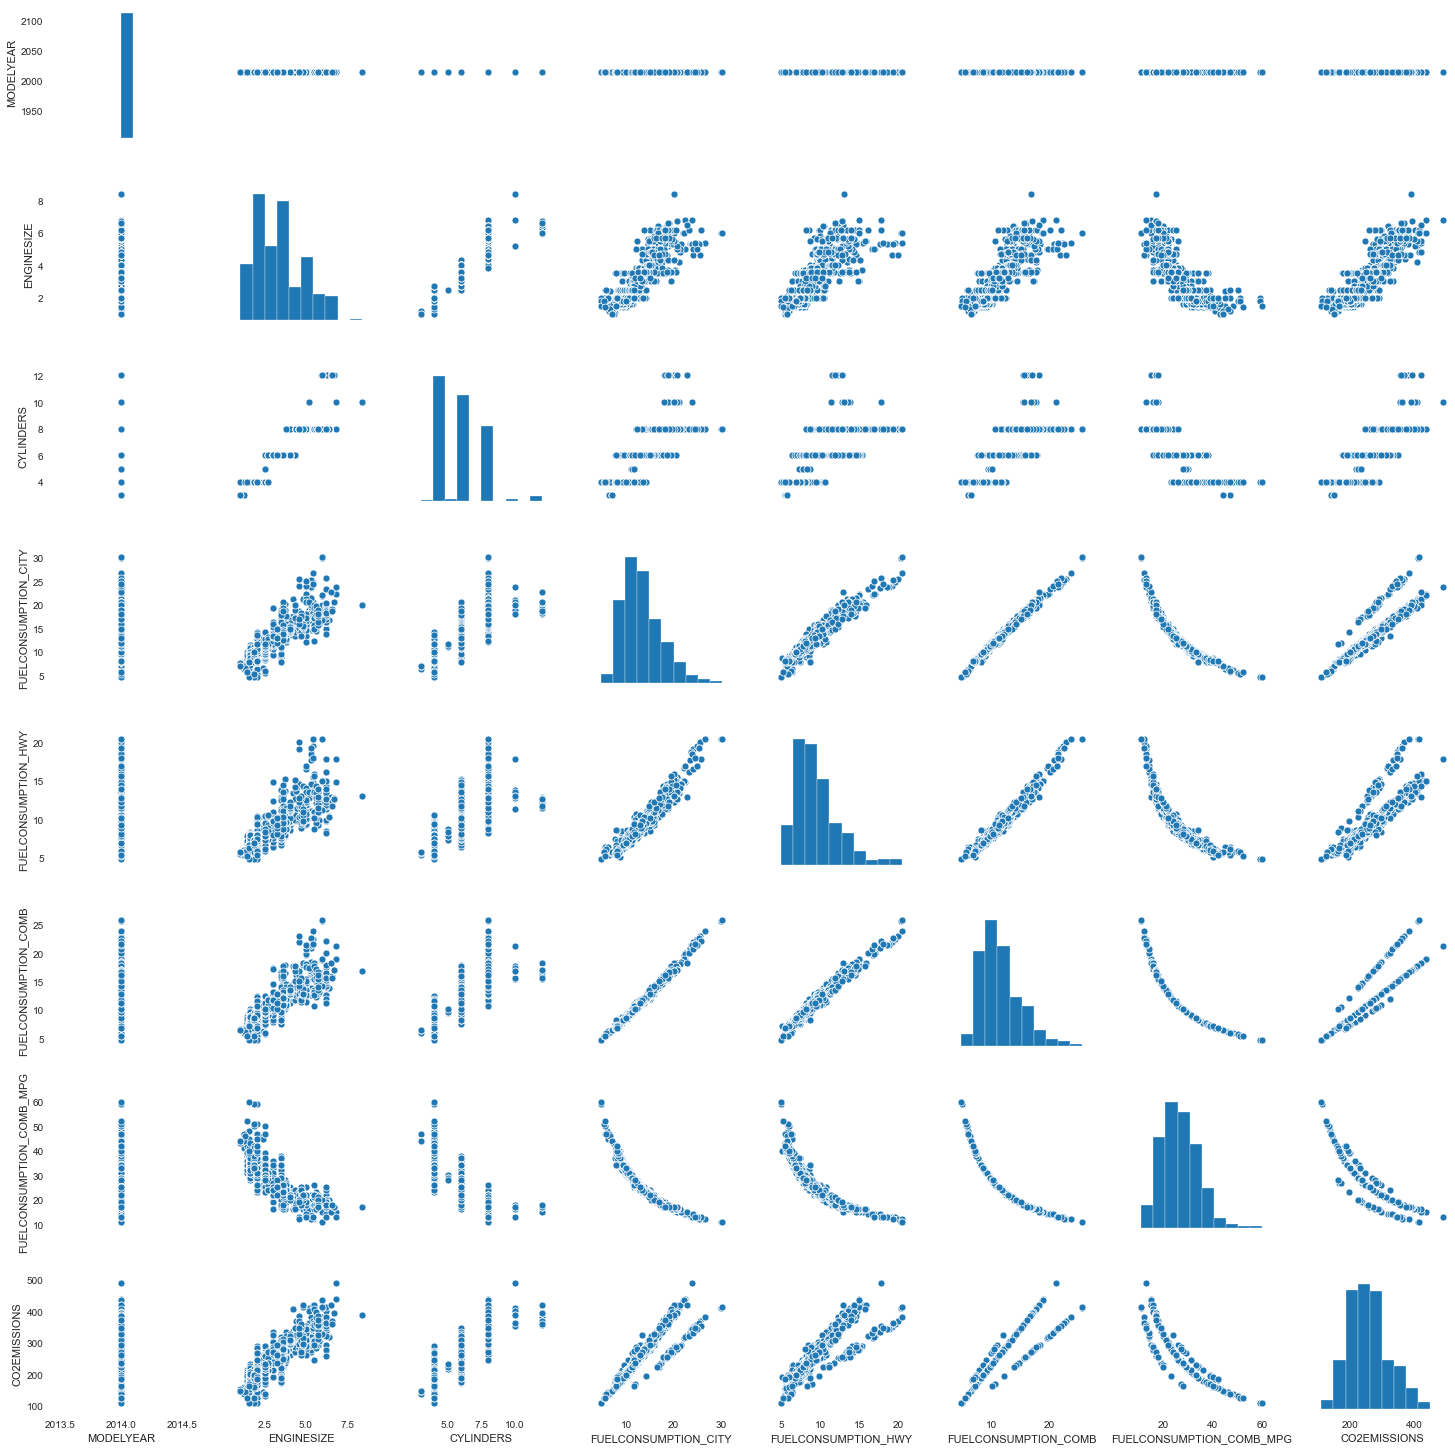

In [10]:
sns.pairplot(Data)

In [11]:
from pandas_profiling import ProfileReport

In [13]:
ProfileReport(Data)

In [15]:
Data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [19]:
Feature  = Data[['ENGINESIZE',
                 'CYLINDERS',
                 'FUELCONSUMPTION_CITY',
                 'FUELCONSUMPTION_HWY',
                 'FUELCONSUMPTION_COMB',
                 'FUELCONSUMPTION_COMB_MPG']]
Feature

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0            2.0          4                   9.9                  6.7   
1            2.4          4                  11.2                  7.7   
2            1.5          4                   6.0                  5.8   
3            3.5          6                  12.7                  9.1   
4            3.5          6                  12.1                  8.7   
...          ...        ...                   ...                  ...   
1062         3.0          6                  13.4                  9.8   
1063         3.2          6                  13.2                  9.5   
1064         3.0          6                  13.4                  9.8   
1065         3.2          6                  12.9                  9.3   
1066         3.2          6                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
0                      8.5                        33  
1                      9.6                        29  
2                      5.9                        48  
3                     11.1                        25  
4                     10.6                        27  
...                    ...                       ...  
1062                  11.8                        24  
1063                  11.5                        25  
1064                  11.8                        24  
1065                  11.3                        25  
1066                  12.8                        22  

[1067 rows x 6 columns]

In [17]:
Traget = Data['CO2EMISSIONS']

In [18]:
Traget[0:5]

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [20]:
### Train The Model
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_Test,Y_Train, Y_Test = train_test_split(Feature,Traget)  # Randomly Select the Data 

In [22]:
X_train.shape

(800, 6)

In [23]:
X_Test.shape

(267, 6)

In [24]:
Y_Train.shape

(800,)

In [25]:
Y_Test.shape

(267,)

In [29]:
X_train.head()

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
263         5.3          8                  16.0                 11.1   
812         1.6          4                  10.0                  7.8   
11          3.5          6                  12.1                  8.3   
682         3.7          6                  13.7                 10.4   
584         5.7          8                  17.3                 11.7   

     FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  
263                  13.8                        20  
812                   9.0                        31  
11                   10.4                        27  
682                  12.2                        23  
584                  14.8                        19

In [30]:
Y_Train.head()

263    317
812    207
11     239
682    281
584    340
Name: CO2EMISSIONS, dtype: int64

#### Mmultiple Linear Regression 
$y = \beta_0+\beta_1*x_1+\beta_2*x_2+........+\beta_n*x_n$

In [26]:
from sklearn.linear_model import LinearRegression   # Importing the model

In [27]:
Model = LinearRegression(normalize=True)    # Callin the Model From Scikit-Learn

In [28]:
Model.fit(X_train,Y_Train)         # Fiting thr Data

LinearRegression(normalize=True)

In [32]:
Model.coef_   # Slopes of Stright Line

array([ 10.03942911,   6.36521694, -11.2123781 ,  -5.33830376,
        20.24013863,  -3.78426166])

In [33]:
Model.intercept_ #intercept Point In Y axis

251.27244601925088

In [34]:
Model.predict([[2.0,4,9.9,6.7,8.5,33]])

array([197.20353725])

In [ ]:
Data.head(1)

In [35]:
New_prediction = Model.predict(X_Test)

$Error = Actual- Predicted$

In [37]:
pd.DataFrame({"Actual_Data":Y_Test,
             "New_Predication":New_prediction,
             "Error":Y_Test-New_prediction}) 

Actual_Data  New_Predication      Error
967           221       241.892511 -20.892511
591           225       220.672396   4.327604
1062          271       265.032148   5.967852
299           294       308.970977 -14.970977
307           251       258.404548  -7.404548
...           ...              ...        ...
760           230       199.435872  30.564128
859           359       337.012581  21.987419
896           315       311.739523   3.260477
573           232       225.563495   6.436505
472           294       352.052418 -58.052418

[267 rows x 3 columns]

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

* $Mean Squared Error (mse) = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}} $
* $Mean Absolute Error(mae) = (\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

In [39]:
mean_squared_error(Y_Test,New_prediction) # Total Mean Error

354.1687391941563

In [40]:
mean_absolute_error(Y_Test,New_prediction)

12.029031736916464

In [41]:
Train_Score = Model.score(X_train,Y_Train)

In [42]:
print("Train Score of a Model is : {}".format(Train_Score))

Train Score of a Model is : 0.8855039079796118


In [43]:
Test_Score = Model.score(X_Test,Y_Test)
print("Test Score of a Model is : {}".format(Test_Score))

Test Score of a Model is : 0.8997269157573581


### Corss Validation of Model
* How many time i want to Corss Validation the model

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cv = cross_val_score(Model, X_train,Y_Train,cv = 20)
cv

array([0.80971709, 0.87738948, 0.88403926, 0.83676627, 0.86926781,
       0.89863223, 0.81400152, 0.86386911, 0.92289355, 0.9298938 ,
       0.87409174, 0.84621177, 0.80755324, 0.85619068, 0.88904456,
       0.92022579, 0.85489515, 0.92381658, 0.91356324, 0.92278832])

In [46]:
np.mean(cv)

0.8757425586285924

In [47]:
np.max(cv)

0.9298937997395205

In [48]:
np.min(cv)

0.8075532398264573

### Summary of the Class
* Data Loading
* EDA
* Seprating the Feature(X/input/indpendent) and Target(Y/Output/Dependending)
* Model Selection for Train and Testing porcess Spliting the Data in to 75% For Train and 25% Testing
* Apply the linear Regression Model
* Fit the Model
* New_predication
* Comparing the Actual Data and New predication and find the Error
* Find the Train Score and Test Score
* Final Find the Overall Error in the data
* Cross Validating the Model